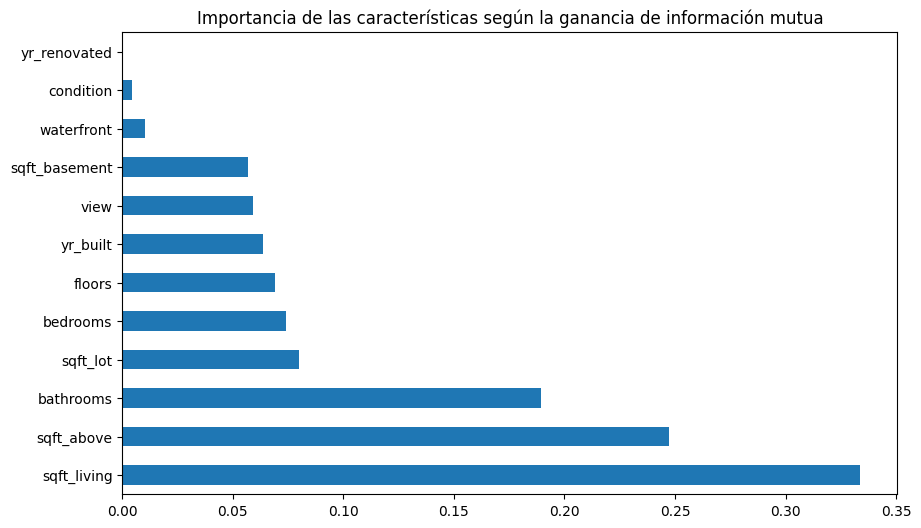

In [2]:
# Importar bibliotecas necesarias
import pandas as pd
from sklearn.feature_selection import mutual_info_regression
import seaborn as sns
import matplotlib.pyplot as plt
from lazypredict.Supervised import LazyRegressor
from sklearn.model_selection import train_test_split

# Cargar el dataset procesado
data = pd.read_csv('processed_house_data.csv')

# Variables predictoras (X) y la variable objetivo (y)
X = data.drop(columns=['price'])
y = data['price']

# Calcular la ganancia de información mutua
mutual_info = mutual_info_regression(X, y)

# Visualizar la importancia de las características
importances = pd.Series(mutual_info, index=X.columns)
importances.sort_values(ascending=False).plot(kind='barh', figsize=(10, 6))
plt.title('Importancia de las características según la ganancia de información mutua')
plt.show()


In [4]:
# Dividir el dataset en conjunto de entrenamiento y prueba (80% - 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
# Usar Lazy Predict para probar múltiples modelos
regressor = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = regressor.fit(X_train, X_test, y_train, y_test)

# Mostrar el rendimiento de los modelos
print(models)


 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉        | 41/42 [00:05<00:00,  8.29it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000976 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1132
[LightGBM] [Info] Number of data points in the train set: 3312, number of used features: 12
[LightGBM] [Info] Start training from score 556737.933249


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 42/42 [00:05<00:00,  7.82it/s]

                               Adjusted R-Squared  R-Squared        RMSE  \
Model                                                                      
PassiveAggressiveRegressor                   0.41       0.42   247462.71   
HuberRegressor                               0.40       0.41   248424.12   
ElasticNet                                   0.38       0.39   253503.25   
PoissonRegressor                             0.38       0.39   253592.67   
KNeighborsRegressor                          0.37       0.38   254308.77   
BayesianRidge                                0.37       0.38   255164.26   
LassoLarsIC                                  0.37       0.38   255658.05   
LassoCV                                      0.37       0.38   255693.53   
LarsCV                                       0.37       0.38   255737.07   
LassoLarsCV                                  0.37       0.38   255737.07   
RidgeCV                                      0.37       0.38   255895.08   
Ridge       

In [8]:
# Verificar las primeras filas del dataframe para conocer las columnas disponibles
print(models.head())

                            Adjusted R-Squared  R-Squared      RMSE  \
Model                                                                 
PassiveAggressiveRegressor                0.41       0.42 247462.71   
HuberRegressor                            0.40       0.41 248424.12   
ElasticNet                                0.38       0.39 253503.25   
PoissonRegressor                          0.38       0.39 253592.67   
KNeighborsRegressor                       0.37       0.38 254308.77   

                            Time Taken  
Model                                   
PassiveAggressiveRegressor        0.12  
HuberRegressor                    0.01  
ElasticNet                        0.01  
PoissonRegressor                  0.01  
KNeighborsRegressor               0.02  


In [9]:
# Ordenar los modelos por la métrica 'R-Squared' en orden descendente
best_model = models.sort_values(by='R-Squared', ascending=False).iloc[0]

# Mostrar el mejor modelo según 'R-Squared'
print(f"Mejor modelo según Lazy Predict: {best_model.name}")



Mejor modelo según Lazy Predict: PassiveAggressiveRegressor
